In [1]:
import numpy as np
import pandas as pd
import matplotlib
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

In [2]:
with open('snr-sync-stream1-2.txt', 'r') as f:
    data = f.read().split()
    floats = []
    for elem in data:
        try:
            floats.append(float(elem))
        except ValueError:
            pass
    not_beamformed_data_1 = np.array(floats)
    print(not_beamformed_data_1)
    print(not_beamformed_data_1.size)

[20.6798 20.9125 21.0116 21.0662 21.1571 21.2157 21.2764 21.3191 21.3479
 21.3743 21.3593 21.2525 21.1971 21.159  21.1381 21.1082 21.087  21.0811
 21.0561 21.0555 21.0508 21.0495 21.0395 21.0302 21.0188 21.0138 21.0132
 21.0111 21.0107 21.0097 21.0119 21.0172 21.0171 21.0163 21.0155 21.0141
 21.0211 21.0223 21.0227 21.0272 21.0293 21.0332 21.0342 21.0352 21.0365
 21.034  21.0341 21.0322 21.0292 21.0235 21.0185 21.0169 21.0142 21.0095
 21.0086]
55


In [3]:
with open('snr-sync-stream2-2.txt', 'r') as f:
    data = f.read().split()
    floats = []
    for elem in data:
        try:
            floats.append(float(elem))
        except ValueError:
            pass
    not_beamformed_data_2 = np.array(floats)
    print(not_beamformed_data_2)
    print(not_beamformed_data_2.size)

[15.2068 14.8759 15.3323 15.6777 16.1459 16.5684 16.825  17.0633 17.2806
 17.5894 17.7896 18.0777 18.2576 18.5822 18.6541 18.8532 18.9771 19.0922
 19.3034 19.3528 19.4897 19.5774 19.698  19.8102 19.8798 19.946  20.0075
 20.1252 20.181  20.2345 20.2866 20.3891 20.4383 20.4848 20.5315 20.5766
 20.6386 20.7014 20.7409 20.7791 20.8348 20.8697 20.9225 20.9562 20.99
 21.0409 21.0903 21.122  21.1536 21.2147 21.2442 21.2729 21.3005 21.3285
 21.3644]
55


In [5]:
with open('snr-1D-beam-synced', 'r') as f:
    data = f.read().split()
    floats = []
    for elem in data:
        try:
            floats.append(float(elem))
        except ValueError:
            pass
    beamformed_data = np.array(floats)
    print(beamformed_data)
    print(beamformed_data.size)

[23.8332 23.7899 23.7596 23.7669 23.8002 23.8176 23.8591 23.8853 23.8931
 23.8503 23.7601 23.6657 23.619  23.5639 23.5346 23.5047 23.4874 23.47
 23.4583 23.4536 23.449  23.444  23.4368 23.4317 23.4308 23.4316 23.4372
 23.4369 23.4386 23.4427 23.4443 23.4447 23.4444 23.4447 23.4466 23.4524
 23.4565 23.4571 23.462  23.4642 23.4662 23.4689 23.4715 23.4738 23.4725
 23.4721 23.471  23.47   23.4647 23.4588 23.4578 23.4546 23.4509 23.4507]
54


In [7]:
diff = abs(not_beamformed_data_1.size-beamformed_data.size) 
if diff != 0:
    if not_beamformed_data_1.size > beamformed_data.size:
        not_beamformed_data_1 = not_beamformed_data_1[: -diff or None] 
    else:
        beamformed_data = beamformed_data[: -diff or None]
print(not_beamformed_data_1.size)

54


In [8]:
diff = abs(not_beamformed_data_2.size-beamformed_data.size)
if diff != 0: 
    if not_beamformed_data_2.size > beamformed_data.size:
        not_beamformed_data_2 = not_beamformed_data_2[: -diff or None]
    else:
        beamformed_data = beamformed_data[: -diff or None]  
print(not_beamformed_data_2.size)

54


In [9]:
size = beamformed_data.size
x = np.linspace(1, size, num=size)
print(x.size)

54


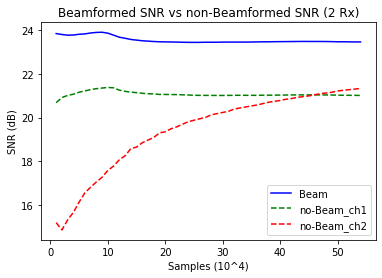

In [11]:
fig, ax = plt.subplots()

l1, = ax.plot(x, beamformed_data, 'b')
l2, = ax.plot(x, not_beamformed_data_1, 'g--')
l3, = ax.plot(x, not_beamformed_data_2, 'r--')
ax.set_ylabel('SNR (dB)')
ax.set_title('Beamformed SNR vs non-Beamformed SNR (2 Rx)')
# ax.set_xlabel(r'$\{Samples\(10^4)}$')
ax.legend((l1, l2, l3), \
          ('Beam', 'no-Beam_ch1', 'no-Beam_ch2'))
ax.set_xlabel('Samples (10^4)')
plt.show()